In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data=pd.read_csv(r"D:\ICT Academy\TCS internship\Activity Report\salarydata.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [3]:
data.shape

(32561, 14)

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

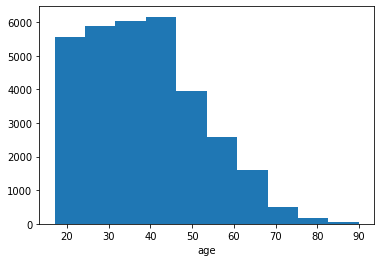

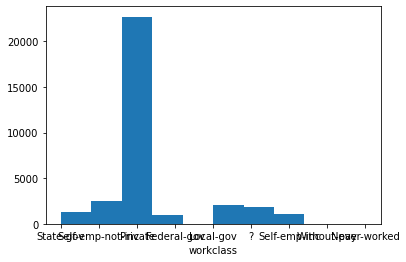

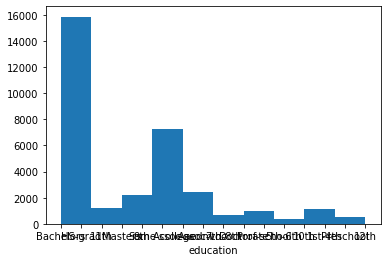

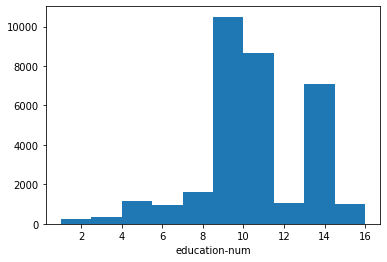

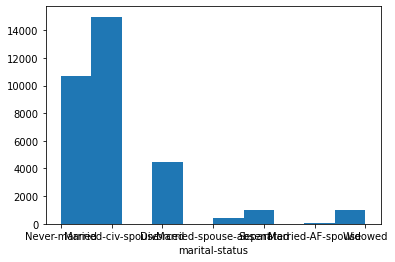

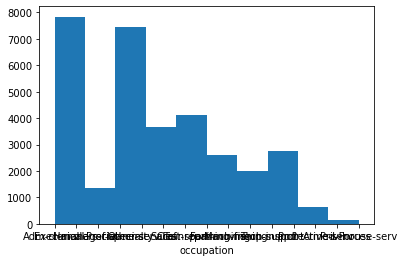

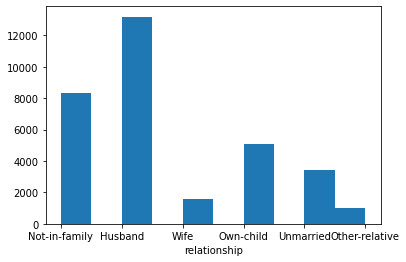

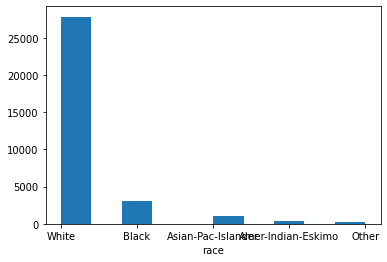

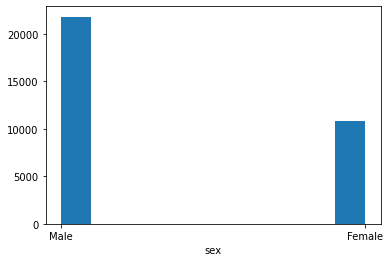

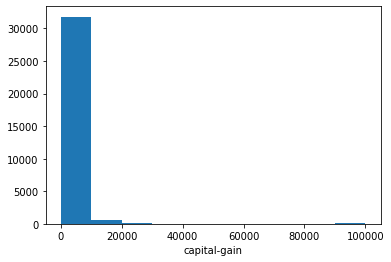

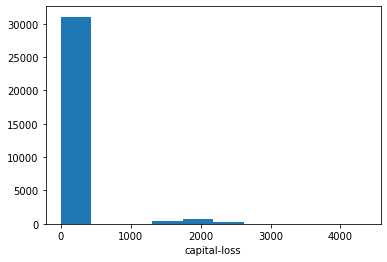

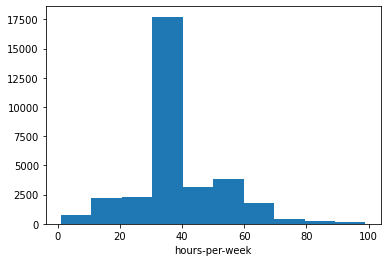

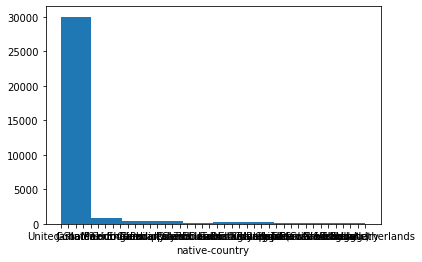

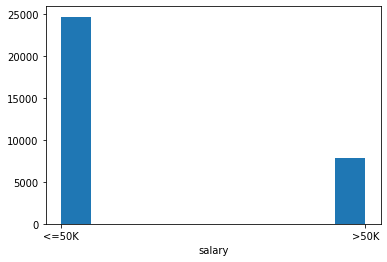

In [5]:
cols=data.columns
for i in cols:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
data.duplicated().sum()

3465

In [9]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Preprocessing

In [10]:
#handling duplicate values
duplicateindex=data[data.duplicated()].index
#droping duplicate values
data=data.drop(duplicateindex,axis=0)

In [11]:
#checking for unique values to find any invalid data is present in it 
cols=data.columns
for i in cols:
    print(i)
    print(data[i].nunique())
    print(data[i].unique())

age
73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

In [12]:
#replacing the invalid data  with null values
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [13]:
#handling null values present within the dataset
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

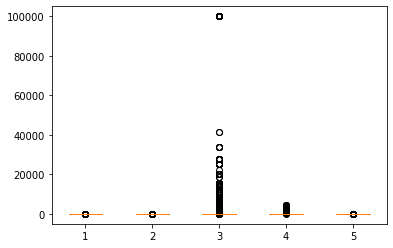

In [14]:
#checking for outliers
numericcols=['age','education-num','capital-gain','capital-loss','hours-per-week']
plt.boxplot(data[numericcols])
plt.show()

In [15]:
#we are not handling the outlires because handling of outlires lead to decrease in the accuracy score in this case

In [16]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
data=data.drop(['capital-gain','capital-loss','native-country'],axis=1)
data.head()
#dropping because they are not related to a employee salary

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [18]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [19]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'salary'],
      dtype='object')

In [20]:
colencoding=['workclass', 'education','marital-status',
       'occupation', 'relationship', 'race', 'sex']
codings={}
encodings={}
for i in colencoding:
    codings[i]=data[i].unique()
    encodings[i]=LE.fit_transform(data[i].unique())
    data[i]=LE.fit_transform(data[i])
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,6,9,13,4,0,1,4,1,40,<=50K
1,50,5,9,13,2,3,0,4,1,13,<=50K
2,38,3,11,9,0,5,1,4,1,40,<=50K
3,53,3,1,7,2,5,0,2,1,40,<=50K
4,28,3,9,13,2,9,5,2,0,40,<=50K


In [21]:
codings

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
        'Oth

In [22]:
encodings

{'workclass': array([6, 5, 3, 0, 1, 4, 7, 2]),
 'education': array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2]),
 'marital-status': array([4, 2, 0, 3, 5, 1, 6]),
 'occupation': array([ 0,  3,  5,  9,  7, 11,  2, 13,  4,  6, 12, 10,  1,  8]),
 'relationship': array([1, 0, 5, 3, 4, 2]),
 'race': array([4, 2, 1, 0, 3]),
 'sex': array([1, 0])}

In [24]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
data['age']=SS.fit_transform(data[['age']])
data['hours-per-week']=SS.fit_transform(data[['hours-per-week']])
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,-0.018364,6,9,13,4,0,1,4,1,-0.050083,<=50K
1,0.785323,5,9,13,2,3,0,4,1,-2.170191,<=50K
2,-0.091426,3,11,9,0,5,1,4,1,-0.050083,<=50K
3,1.004511,3,1,7,2,5,0,2,1,-0.050083,<=50K
4,-0.822050,3,9,13,2,9,5,2,0,-0.050083,<=50K


<AxesSubplot:>

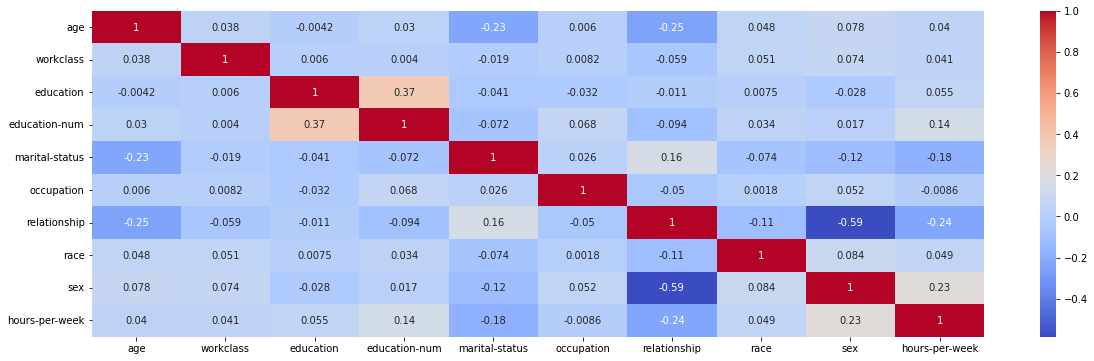

In [25]:
#checking for non correlated values within the data
corr=data.corr()
plt.subplots(figsize=(20,6))
sns.heatmap(corr,annot=True, cmap='coolwarm')

# Splitting of data and Model Building

In [26]:
X=data.drop('salary',axis=1)
Y=data['salary']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)

# Logistic Regression

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model_lr=LR.fit(X_train,Y_train)
y_model_lr=model_lr.predict(X_test)


In [28]:
#now import accuracy matrices
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score;

In [29]:
confusion_matrix(Y_test,y_model_lr)

array([[4078,  319],
       [ 905,  518]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_model_lr))

              precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      4397
        >50K       0.62      0.36      0.46      1423

    accuracy                           0.79      5820
   macro avg       0.72      0.65      0.66      5820
weighted avg       0.77      0.79      0.77      5820



In [31]:
print('Accuracy Score=',accuracy_score(Y_test,y_model_lr))
print('F1 Score <=50K=',f1_score(Y_test,y_model_lr,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_model_lr,pos_label='>50K'))

Accuracy Score= 0.7896907216494845
F1 Score <=50K= 0.8695095948827293
F1 Score >50K= 0.4584070796460177


# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
model_DTC=DTC.fit(X_train,Y_train)
y_model_DTC=model_DTC.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_model_DTC))
print("Classification Report")
print(classification_report(Y_test,y_model_DTC))
print('Accuracy Score=',accuracy_score(Y_test,y_model_DTC))
print('F1 Score <=50K=',f1_score(Y_test,y_model_DTC,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_model_DTC,pos_label='>50K'))

Confusion Matrix
[[3713  684]
 [ 737  686]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.83      0.84      0.84      4397
        >50K       0.50      0.48      0.49      1423

    accuracy                           0.76      5820
   macro avg       0.67      0.66      0.67      5820
weighted avg       0.75      0.76      0.75      5820

Accuracy Score= 0.7558419243986254
F1 Score <=50K= 0.8393805809879055
F1 Score >50K= 0.4912280701754385


# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
RFC=DecisionTreeClassifier()
model_RFC=RFC.fit(X_train,Y_train)
y_model_RFC=model_RFC.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_model_RFC))
print("Classification Report")
print(classification_report(Y_test,y_model_RFC))
print('Accuracy Score=',accuracy_score(Y_test,y_model_RFC))
print('F1 Score <=50K=',f1_score(Y_test,y_model_RFC,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_model_RFC,pos_label='>50K'))

Confusion Matrix
[[3718  679]
 [ 730  693]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.84      0.85      0.84      4397
        >50K       0.51      0.49      0.50      1423

    accuracy                           0.76      5820
   macro avg       0.67      0.67      0.67      5820
weighted avg       0.76      0.76      0.76      5820

Accuracy Score= 0.7579037800687285
F1 Score <=50K= 0.8407009609949123
F1 Score >50K= 0.49588550983899815


# SVM

In [34]:
from sklearn.svm import SVC
svc_l=SVC(kernel='linear')
model_svc=svc_l.fit(X_train,Y_train)
y_model_svc=model_svc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_model_svc))
print("Classification Report")
print(classification_report(Y_test,y_model_svc))
print('Accuracy Score=',accuracy_score(Y_test,y_model_svc))
print('F1 Score <=50K=',f1_score(Y_test,y_model_svc,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_model_svc,pos_label='>50K'))

Confusion Matrix
[[4115  282]
 [ 919  504]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.87      4397
        >50K       0.64      0.35      0.46      1423

    accuracy                           0.79      5820
   macro avg       0.73      0.65      0.66      5820
weighted avg       0.77      0.79      0.77      5820

Accuracy Score= 0.7936426116838488
F1 Score <=50K= 0.8726540133601951
F1 Score >50K= 0.4563150746944319


In [35]:
from sklearn.svm import SVC
svc_r=SVC(kernel='rbf')
model_svc_rfb=svc_r.fit(X_train,Y_train)
y_model_svc_rfb=model_svc_rfb.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_model_svc_rfb))
print("Classification Report")
print(classification_report(Y_test,y_model_svc_rfb))
print('Accuracy Score=',accuracy_score(Y_test,y_model_svc_rfb))
print('F1 Score <=50K=',f1_score(Y_test,y_model_svc_rfb,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_model_svc_rfb,pos_label='>50K'))

Confusion Matrix
[[4160  237]
 [ 879  544]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      4397
        >50K       0.70      0.38      0.49      1423

    accuracy                           0.81      5820
   macro avg       0.76      0.66      0.69      5820
weighted avg       0.79      0.81      0.79      5820

Accuracy Score= 0.8082474226804124
F1 Score <=50K= 0.8817295464179736
F1 Score >50K= 0.4936479128856624


# KNN

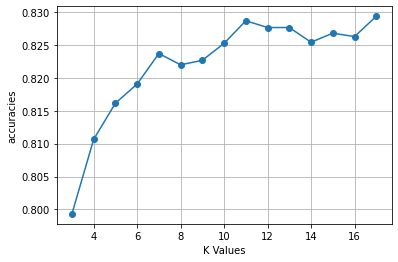

In [36]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_KNN)
    metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Values')
plt.ylabel('accuracies')
plt.grid()

In [37]:
classifier=KNeighborsClassifier(n_neighbors=17)
classifier=classifier.fit(X_train,Y_train)
y_pred_KNN=classifier.predict(X_test)
acc=accuracy_score(Y_test,y_pred_KNN)

In [38]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred_KNN))
print("Classification Report")
print(classification_report(Y_test,y_pred_KNN))
print('Accuracy Score=',accuracy_score(Y_test,y_pred_KNN))
print('F1 Score <=50K=',f1_score(Y_test,y_pred_KNN,pos_label='<=50K'))
print('F1 Score >50K=',f1_score(Y_test,y_pred_KNN,pos_label='>50K'))

Confusion Matrix
[[3959  438]
 [ 555  868]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4397
        >50K       0.66      0.61      0.64      1423

    accuracy                           0.83      5820
   macro avg       0.77      0.76      0.76      5820
weighted avg       0.83      0.83      0.83      5820

Accuracy Score= 0.8293814432989691
F1 Score <=50K= 0.8885646953203904
F1 Score >50K= 0.6361304507145473


# KFold Cross Validation

In [40]:
from sklearn.model_selection import KFold
Kfold_validator=KFold(10)

In [41]:
for train_index,test_index in Kfold_validator.split(X,Y):
    print("Train Index=",train_index)
    print()
    print("Test Index=",test_index)
    print()

Train Index= [ 2910  2911  2912 ... 29093 29094 29095]

Test Index= [   0    1    2 ... 2907 2908 2909]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [2910 2911 2912 ... 5817 5818 5819]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [5820 5821 5822 ... 8727 8728 8729]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [ 8730  8731  8732 ... 11637 11638 11639]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [11640 11641 11642 ... 14547 14548 14549]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [14550 14551 14552 ... 17457 17458 17459]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [17460 17461 17462 ... 20366 20367 20368]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [20369 20370 20371 ... 23275 23276 23277]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [23278 23279 23280 ... 26184 26185 26186]

Train Index= [    0

In [42]:
from sklearn.model_selection import cross_val_score
cv_results_lr=cross_val_score(LR,X,Y,cv=Kfold_validator)
print("LR",cv_results_lr)
print("Mean=",np.mean(cv_results_lr))
print()
cv_results_dtc=cross_val_score(DTC,X,Y,cv=Kfold_validator)
print("Decision Tree Classifier",cv_results_dtc)
print("Mean=",np.mean(cv_results_dtc))
print()
cv_results_rfc=cross_val_score(RFC,X,Y,cv=Kfold_validator)
print("Random Forest Classifier",cv_results_rfc)
print("Mean=",np.mean(cv_results_rfc))
print()
cv_results_svcl=cross_val_score(svc_l,X,Y,cv=Kfold_validator)
print("Scaler Vector Machine_Linear",cv_results_svcl)
print("Mean=",np.mean(cv_results_svcl))
print()
cv_results_svcr=cross_val_score(svc_r,X,Y,cv=Kfold_validator)
print("Scaler Vector Machine_rbf",cv_results_svcr)
print("Mean=",np.mean(cv_results_svcr))
print()
cv_results_knn=cross_val_score(classifier,X,Y,cv=Kfold_validator)
print("KNN",cv_results_knn)
print("Mean=",np.mean(cv_results_knn))
print()

LR [0.79415808 0.80206186 0.80893471 0.79621993 0.80103093 0.8024055
 0.78996219 0.79614988 0.80027501 0.7793056 ]
Mean= 0.7970503674459759

Decision Tree Classifier [0.76082474 0.75051546 0.75532646 0.74570447 0.76769759 0.7556701
 0.76246133 0.75971124 0.76521141 0.75971124]
Mean= 0.7582834053340799

Random Forest Classifier [0.76391753 0.75120275 0.76116838 0.74604811 0.76632302 0.75292096
 0.760055   0.75558611 0.7662427  0.76246133]
Mean= 0.7585925891799239

Scaler Vector Machine_Linear [0.79415808 0.804811   0.81477663 0.80068729 0.80206186 0.80721649
 0.79030595 0.79821244 0.80336886 0.77999312]
Mean= 0.7995591711467788

Scaler Vector Machine_rbf [0.80068729 0.8137457  0.82439863 0.81168385 0.81512027 0.81786942
 0.80715022 0.81333792 0.81333792 0.79408732]
Mean= 0.8111418526932059

KNN [0.81890034 0.82164948 0.83608247 0.81546392 0.82474227 0.82233677
 0.82433826 0.82708835 0.83293228 0.80336886]
Mean= 0.822690299922388



In [43]:
from sklearn.model_selection import StratifiedKFold
sfold_validator=StratifiedKFold(n_splits=7)
for train_index, test_index in sfold_validator.split(X,Y):
    print("Train Index=",train_index)
    print()
    print("Test Index=",test_index)
    print()

Train Index= [ 4138  4139  4140 ... 29093 29094 29095]

Test Index= [   0    1    2 ... 4227 4235 4240]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [4138 4139 4140 ... 8507 8512 8515]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [ 8238  8239  8240 ... 12666 12668 12671]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [12393 12394 12395 ... 16875 16876 16880]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [16557 16558 16560 ... 21093 21097 21111]

Train Index= [    0     1     2 ... 29093 29094 29095]

Test Index= [20679 20681 20682 ... 25128 25132 25136]

Train Index= [    0     1     2 ... 25128 25132 25136]

Test Index= [24887 24888 24889 ... 29093 29094 29095]



In [44]:
print("StratifiedKFold Method")
from sklearn.model_selection import cross_val_score
cv_results_lr_s=cross_val_score(LR,X,Y,cv=sfold_validator)
print("LR",cv_results_lr)
print("Mean=",np.mean(cv_results_lr_s))
print()
cv_results_dtc_s=cross_val_score(DTC,X,Y,cv=sfold_validator)
print("Decision Tree Classifier",cv_results_dtc_s)
print("Mean=",np.mean(cv_results_dtc_s))
print()
cv_results_rfc_s=cross_val_score(RFC,X,Y,cv=sfold_validator)
print("Random Forest Classifier",cv_results_rfc_s)
print("Mean=",np.mean(cv_results_rfc_s))
print()
cv_results_svcl_s=cross_val_score(svc_l,X,Y,cv=sfold_validator)
print("Scaler Vector Machine_Linear",cv_results_svcl_s)
print("Mean=",np.mean(cv_results_svcl_s))
print()
cv_results_svcr_s=cross_val_score(svc_r,X,Y,cv=sfold_validator)
print("Scaler Vector Machine_rbf",cv_results_svcr_s)
print("Mean=",np.mean(cv_results_svcr_s))
print()
cv_results_knn_s=cross_val_score(classifier,X,Y,cv=sfold_validator)
print("KNN",cv_results_knn_s)
print("Mean=",np.mean(cv_results_knn_s))
print()

StratifiedKFold Method
LR [0.79415808 0.80206186 0.80893471 0.79621993 0.80103093 0.8024055
 0.78996219 0.79614988 0.80027501 0.7793056 ]
Mean= 0.7970165388403421

Decision Tree Classifier [0.75583353 0.75679577 0.75102237 0.75727688 0.75962464 0.77165544
 0.75914341]
Mean= 0.7587645769093136

Random Forest Classifier [0.75366851 0.75222516 0.75222516 0.76088525 0.75769971 0.77213667
 0.76010587]
Mean= 0.7584209059504506

Scaler Vector Machine_Linear [0.79624729 0.8053885  0.79913399 0.80322348 0.79090472 0.80654475
 0.79475457]
Mean= 0.7994567581031083

Scaler Vector Machine_rbf [0.80322348 0.81332692 0.81236469 0.81597306 0.80534167 0.81568816
 0.8087103 ]
Mean= 0.8106611821758392

KNN [0.81958143 0.82992543 0.82006255 0.8277604  0.82242541 0.82651588
 0.81737247]
Mean= 0.8233776526259745



In [45]:
#we have completed the processing and model creation and the best model we have got is KNN model with a accuracy score of 0.829 